In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\rjain.RONAKJAIN\OneDrive\Desktop\datset.csv")

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [5]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
numeric_cols=df.select_dtypes(include='number').columns
df[numeric_cols]=df[numeric_cols].fillna(df[numeric_cols].mean())

In [7]:
numeric_cols

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')

In [8]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        486
num           0
dtype: int64

In [9]:
df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])

C:\Users\rjain.RONAKJAIN\AppData\Local\Temp\ipykernel_14036\2521522250.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
C:\Users\rjain.RONAKJAIN\AppData\Local\Temp\ipykernel_14036\2521522250.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].fillna(df['exang'].mode()[0])


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

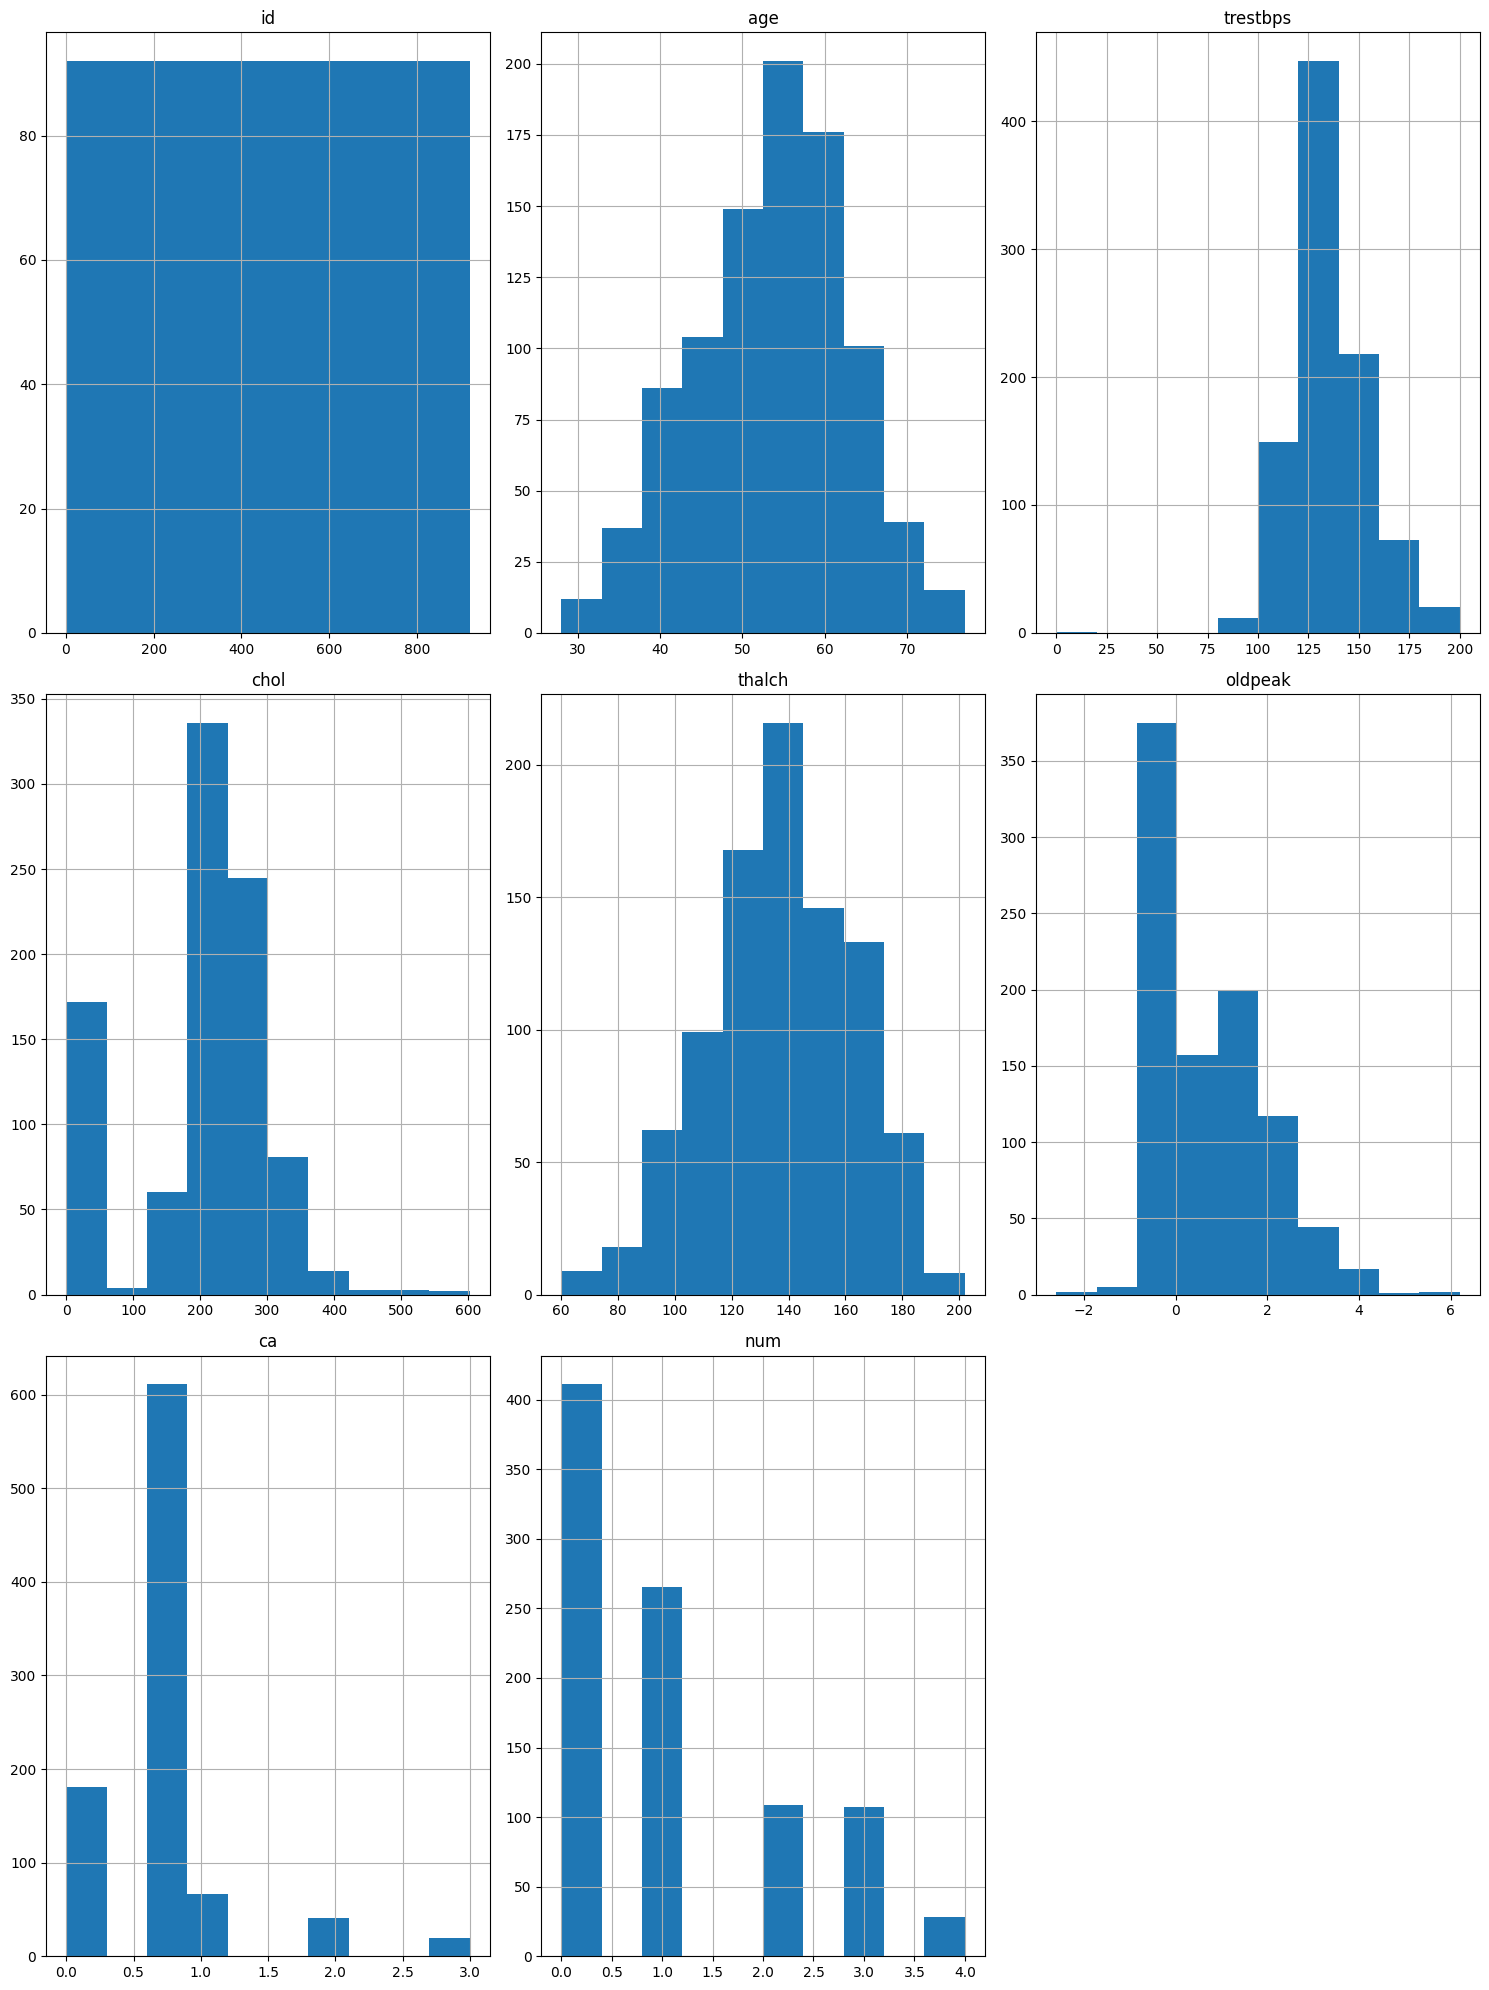

In [10]:
df[numeric_cols].hist(figsize=(15,20))
plt.tight_layout()
plt.show()

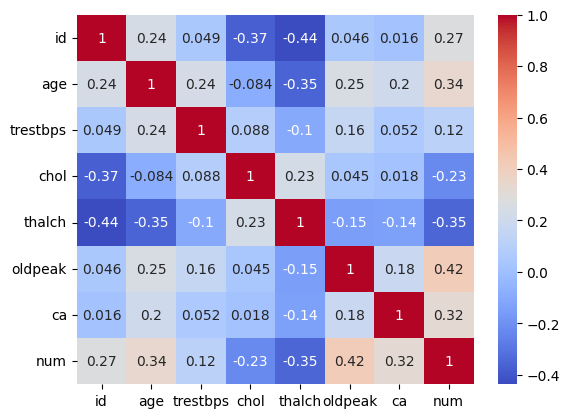

In [11]:
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm')
plt.show()

# model training

In [12]:
cat_cols=df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
    cat_cols.remove('num')

In [13]:
cat_cols

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [14]:
x=df.drop('num',axis=1)
y=(df['num']>0).astype(int)

In [15]:
x=pd.get_dummies(x,columns=cat_cols)
print("final feature encoding:",x.columns)

final feature encoding: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


Advanced model and feature engineering : train test split normalization,modleling, and model evaluation

In [16]:
from sklearn.model_selection import train_test_split # train test split
from sklearn.preprocessing import StandardScaler # scalization to specific range

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

new value=(x-mean)/standard devoiation

In [18]:
sc = StandardScaler()
sc_train_scaled=sc.fit_transform(x_train) # scale the training data 
sc_test_scaled=sc.transform(x_test) # scale the test data 

In [19]:
 from sklearn.linear_model import LogisticRegression

In [20]:
lr=LogisticRegression()
lr.fit(sc_train_scaled,y_train)

LogisticRegression()

model evaluation

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [22]:
y_pred=lr.predict(sc_test_scaled)
print("lr  test accuracy:",accuracy_score(y_test,y_pred)*100)
print("classification report:",classification_report(y_test,y_pred))


lr  test accuracy: 84.23913043478261
classification report:               precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



 # random forest AND feature importance

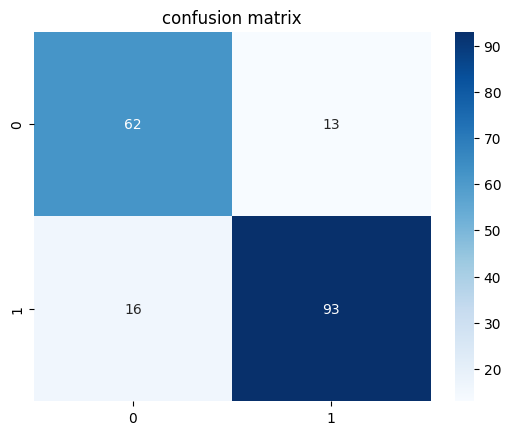

In [23]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("confusion matrix")
plt.show()
         

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(sc_train_scaled,y_train)
y_pred_rf=rf.predict(sc_test_scaled)
print("random forest accuracy:",accuracy_score(y_test,y_pred_rf)*100)

random forest accuracy: 88.58695652173914


In [26]:
print("classification report:",classification_report(y_test,y_pred_rf))


classification report:               precision    recall  f1-score   support

           0       0.85      0.88      0.86        75
           1       0.92      0.89      0.90       109

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



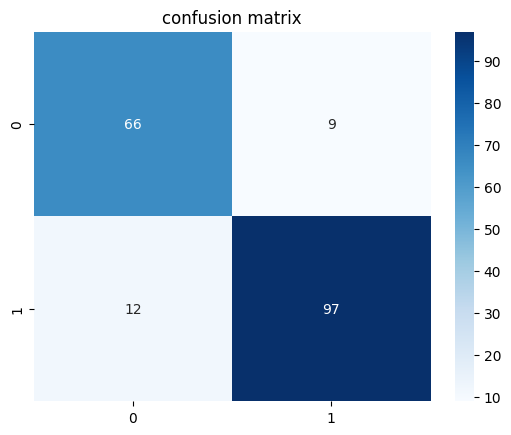

In [27]:
cm=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("confusion matrix")
plt.show()
         

feature importance

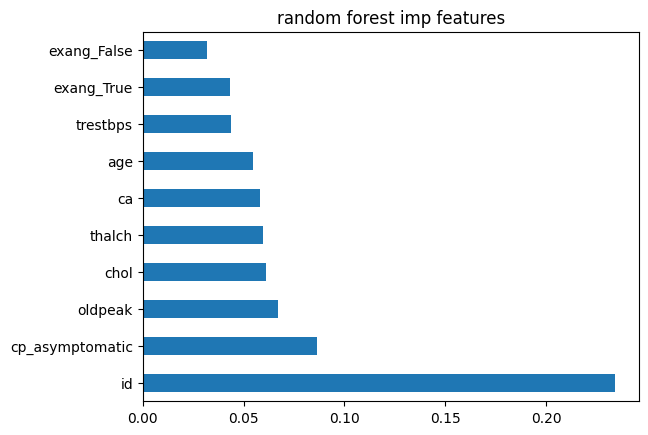

In [28]:
feat_imp=pd.Series(rf.feature_importances_,index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("random forest imp features")
plt.show()

saving model 

In [29]:
import joblib
joblib.dump(rf,'heart_rf_model.pkl')
joblib.dump(sc,'heart_scaler.pkl')

['heart_scaler.pkl']

In [32]:
sample = x.head(1)
sample.to_csv('heart_user_template.csv',index=False)
print("user template saved as '('heart_user_template.csv'")

user template saved as '('heart_user_template.csv'


# user upload and prediction

In [34]:
df1=pd.read_csv(r"C:\Users\rjain.RONAKJAIN\OneDrive\Desktop\New folder (2)\hhh.csv")

In [37]:
df1.head(5)

,age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,58,130,220,1,normal,150,False,1.4,flat,0,fixed defect,0,1,0,0,0,1
1,67,160,276,0,lv hypertrophy,108,True,1.5,flat,3,normal,0,1,1,0,0,0
2,42,120,230,0,normal,170,False,1.0,upsloping,0,reversable defect,1,0,0,0,1,0
3,50,130,210,0,lv hypertrophy,158,False,0.8,flat,0,normal,0,1,0,0,1,0
4,45,114,230,0,normal,165,False,1.1,downsloping,0,normal,1,0,0,1,0,0


In [49]:
# getting columns list from training datadrame
numeric_cols=df.select_dtypes(include='number').columns.tolist()
cat_cols=df.select_dtypes(include='object').columns.tolist()
bool_cols=df.select_dtypes(include='bool').columns.tolist()


#droppring columns which are extra in user_df than required to avois error
numeric_cols=[col for col in numeric_cols if col in df1.columns]
cat_cols=[col for col in cat_cols if col in df1.columns]
bool_cols=[col for col in bool_cols if col in df1.columns]


#fill the missing numeric column ans categorical column and bool columns
df1[numeric_cols]=df1[numeric_cols].fillna(df1[numeric_cols].mean())

for col in cat_cols:
    df1[col]=df1[col].fillna('Unknown')

for col in bool_cols:
    df1[col]=df1[col].astype(int)

# one hot encoding for categorical column
df1_encoded=pd.get_dummies(df1,columns=cat_cols)

# align columns
df1_encoded=df1_encoded.reindex(columns=x.columns,fill_value=0)
# scaler data
scaler=joblib.load('heart_scaler.pkl')
df1_scaled=scaler.transform(df1_encoded)

# prediction
model=joblib.load('heart_rf_model.pkl')
preds=model.predict(df1_scaled)
df1['heart_disese_prediction']=preds
print(pd.DataFrame(df1))

   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                   0           